In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [ ]:
sp = pd.read_csv("/content/cleaned_sp.csv"
                )
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
sp["phone_ram"] = sp.phone_ram.astype("Int64")
sp["storage"] = sp.storage.astype("Int64")
sp["battery_mah"] = sp.battery_mah.astype("Int64")
sp["front_camera"] = sp.battery_mah.astype("Int64")

sp.rename(columns={"inches":"screen_size"},inplace=True)

# Columns Datatype
Numerical: [ price,rating,speed,phone_ram,storage,battery_mah,screen_Size,width height,front_cam,n_rear_cam]

Categorical:[brand_name,has_5g,has_nfc,has_dual_sim,has_ir_blaster,processor brand, chipset,coretype, fast_Charging, operating system ]
Mixed:

## Lets Suppose we want to create a predictive model on smartphone output will be price acc to the all description model will predict price of smartphone

### performing eda

<Axes: xlabel='brand_name'>

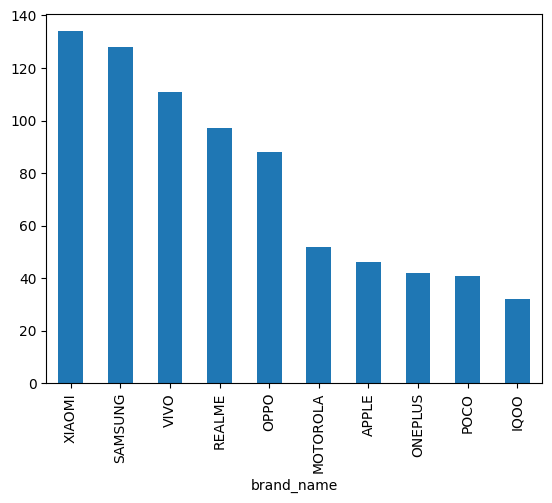

In [ ]:
# top 10 phones brand of the indian market
sp.brand_name.value_counts().head(10).plot(kind = "bar")

In [ ]:
top_brand = sp.brand_name.value_counts().head(10).reset_index()
px.pie(top_brand,names="brand_name",values="count",title="Top 10 Phone brands in Indian Market")

## Price Column Conclusion
- price column has lot of outliers that is why mean is high
- remove that phone whose price is more than 2 lakh because they are special edition

In [ ]:
sp.price.describe()

,price
count,969.000000
mean,32784.345717
std,39675.383347
min,3499.000000
25%,13466.000000
50%,19999.000000
75%,35999.000000
max,650000.000000


<Axes: >

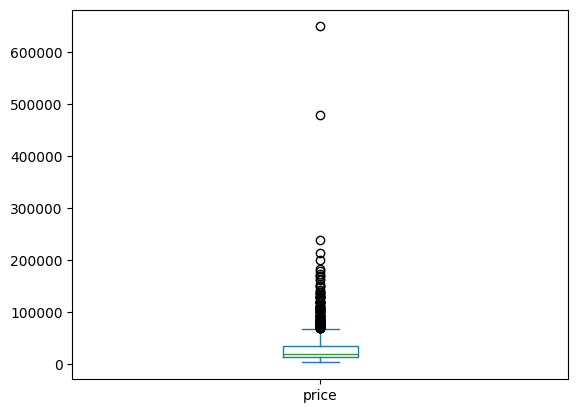

In [ ]:
sp.price.plot(kind = "box")

<Axes: ylabel='Density'>

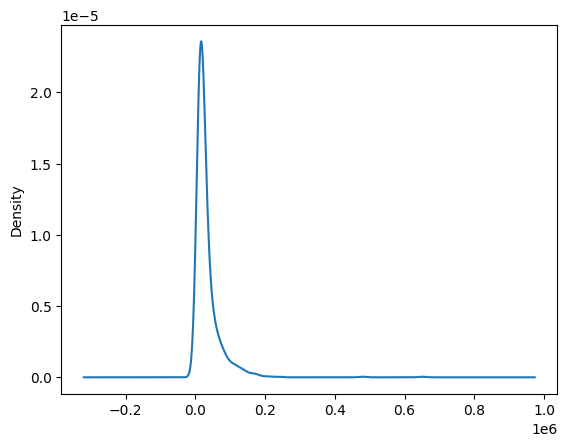

In [ ]:
sp.price.plot(kind = "kde")

In [ ]:
sp.price.skew()

np.float64(6.577228809720798)

In [ ]:
 sp[sp.price > 200000]


,index,brand_name,model,price,rating,has_5g,has_nfc,has_dual_sim,has_ir_blaster,processor_brand,processor_chipset,core_type,speed,phone_ram,storage,battery_mah,has_fast_charging,screen_size,width,height,front_camera,n_rear_cam,operating_system,os_version
422,433,VERTU,Vertu Signature Touch,650000,62.0,False,True,False,False,snapdragon,snapdragon 801,octa core,1.50,2,64,2275,False,4.70,1080,1920,2275,1,android,Android v4.4.2 (KitKat)
473,485,HUAWEI,Huawei Mate 50 RS Porsche Design,239999,81.0,False,True,True,True,snapdragon,snapdragon 8+ gen1,octa core,3.20,<NA>,<NA>,4700,True,6.74,1212,2616,4700,3,hongmeng,Hongmeng OS v3.0
878,923,XIAOMI,Xiaomi Redmi K20 Pro Signature Edition,480000,88.0,False,True,True,False,snapdragon,snapdragon 855,octa core,2.80,8,256,4000,True,6.39,1080,2340,4000,3,android,Android v9.0 (Pie)
942,992,HUAWEI,Huawei Mate 30 RS Porsche Design,214990,78.0,True,True,True,True,kirin,kirin 990,octa core,2.86,12,512,4500,True,6.53,1176,2400,4500,4,android,Android v10


## Rating Column Conclusion

- Almost near to normal distribution
- only two outliers

In [ ]:
sp.rating.describe()

,rating
count,969.000000
mean,78.327141
std,6.941111
min,60.000000
25%,75.000000
50%,79.000000
75%,84.000000
max,89.000000


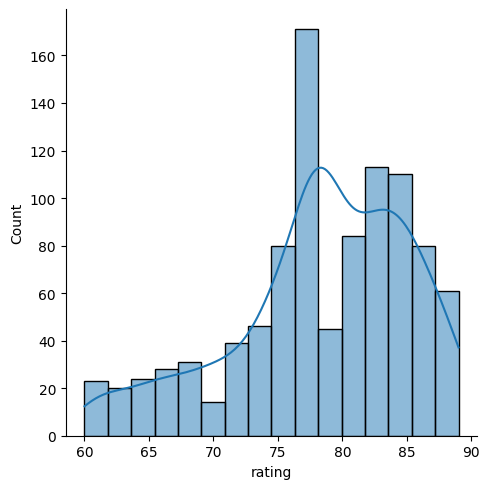

In [ ]:
sns.displot(sp,x = "rating",kind = "hist",kde = True)

In [ ]:
sp.rating.skew()

np.float64(-0.7210351495502133)

<Axes: xlabel='rating'>

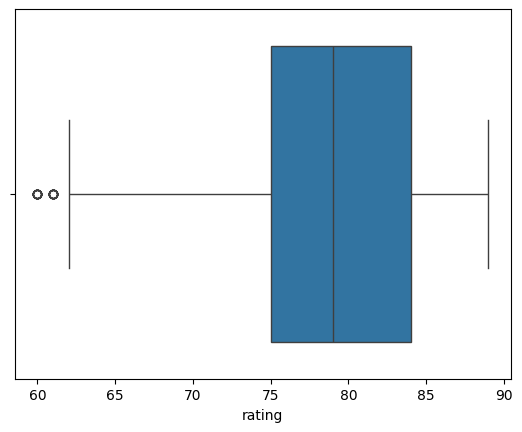

In [ ]:
sns.boxplot(data=sp,x="rating")

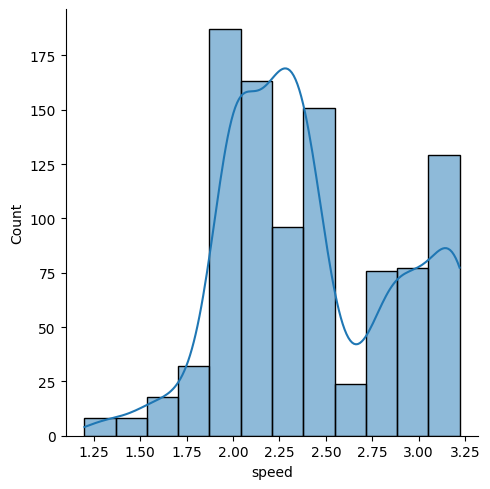

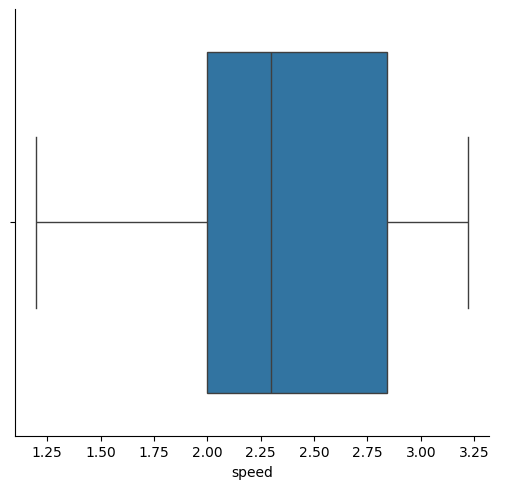

In [ ]:
def plot_graph(col_name):
  sns.displot(kind = "hist", kde = True ,  data = sp, x = col_name,label = col_name)
  sns.catplot(kind = "box", data = sp, x = col_name)

plot_graph("speed")

In [ ]:
sp.speed.skew()

np.float64(0.29755427276545177)

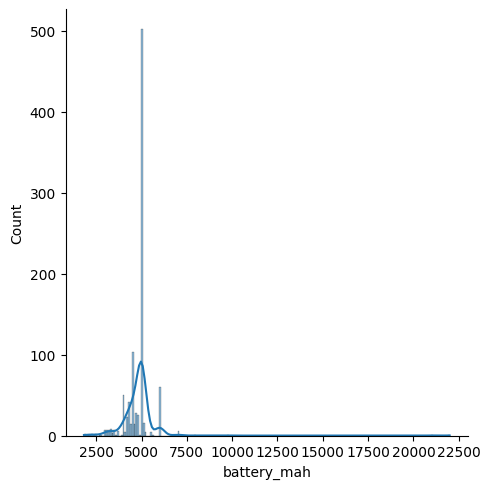

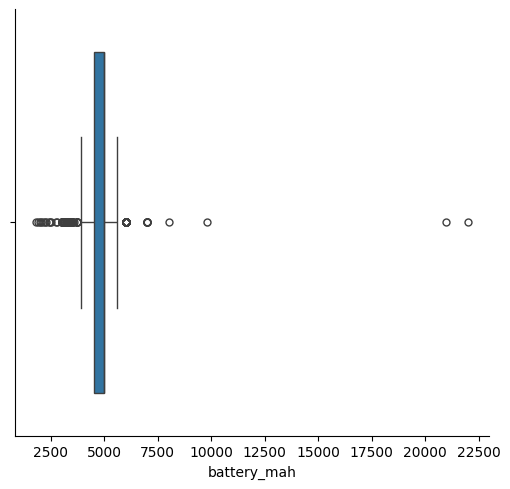

In [ ]:
plot_graph("battery_mah")

In [ ]:
sp.battery_mah.skew()

np.float64(9.297648272958925)

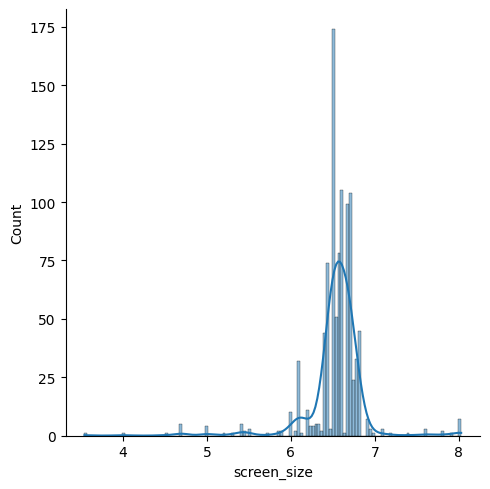

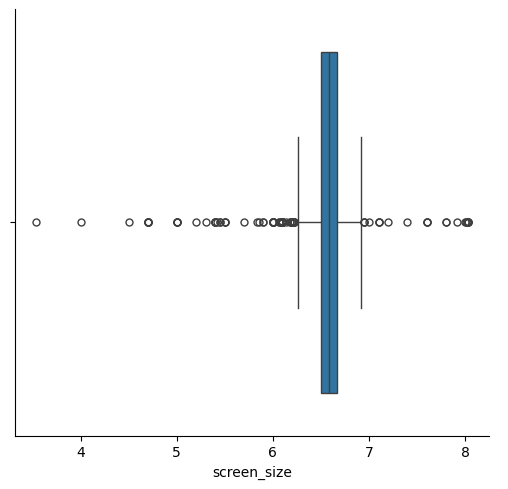

In [ ]:
plot_graph("screen_size")

In [ ]:
sp.screen_size.skew()

np.float64(-2.1024690570012075)

## Has_nfc , has_5g , has_ir_blaster , has_dual_sim ,has_fastcharging

###- conclusion
- we analyze all cols in one go via subplots
- all are normal clear to understand


<Axes: title={'center': 'Has_fast_charging'}>

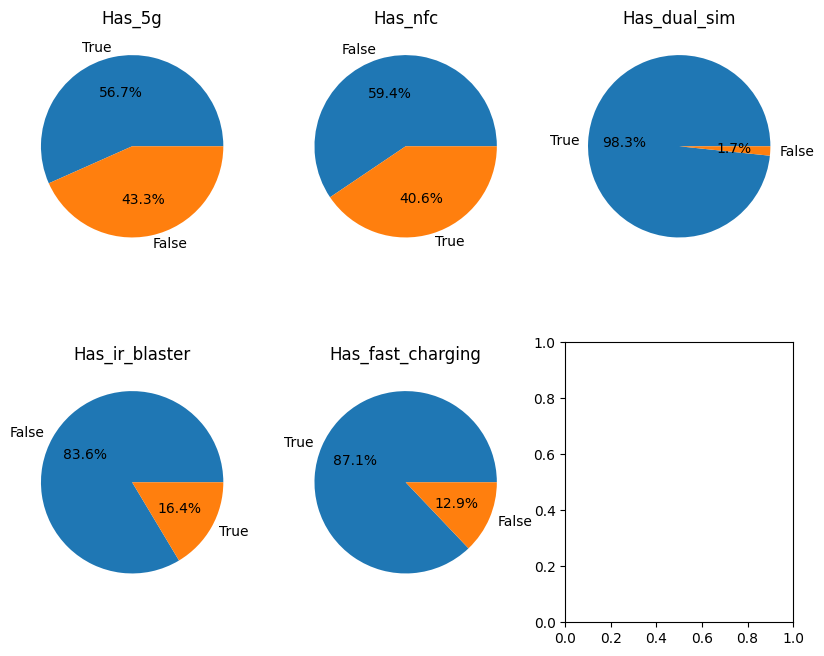

In [ ]:
fig,ax = plt.subplots(2,3,figsize =(10,8) )
sp["has_5g"].value_counts().plot.pie(
    ax=ax[0,0],
    autopct='%1.1f%%',
    title  = "Has_5g",
    ylabel = ""
)
sp["has_nfc"].value_counts().plot.pie(
    ax=ax[0,1],
    autopct='%1.1f%%',
    title  = "Has_nfc",
    ylabel = ""
)
sp["has_dual_sim"].value_counts().plot.pie(
    ax=ax[0,2],
    autopct='%1.1f%%',
    title  = "Has_dual_sim",
    ylabel = ""
)
sp["has_ir_blaster"].value_counts().plot.pie(
    ax=ax[1,0],
    autopct='%1.1f%%',
    title  = "Has_ir_blaster",
    ylabel = ""
)
sp["has_fast_charging"].value_counts().plot.pie(
    ax=ax[1,1],
    autopct='%1.1f%%',
    title  = "Has_fast_charging",
    ylabel = ""
)

<Axes: ylabel='count'>

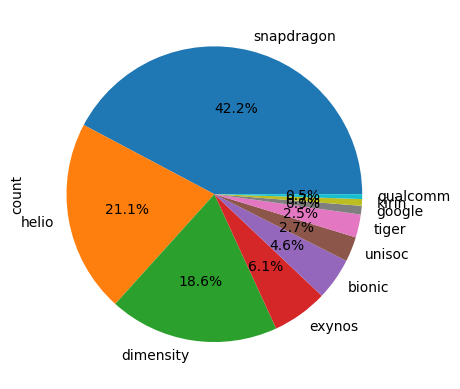

In [ ]:
sp.processor_brand.value_counts().head(10).plot(kind = "pie", autopct = "%0.1f%%")

<Axes: ylabel='count'>

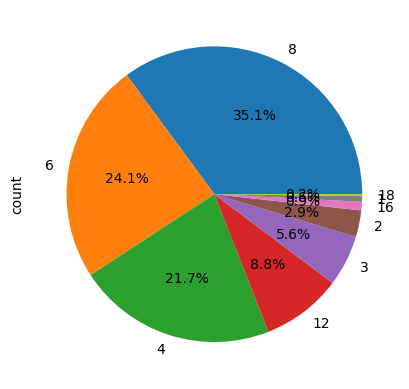

In [ ]:
sp.phone_ram.value_counts().head(10).plot(kind = "pie", autopct = "%0.1f%%")

<Axes: ylabel='count'>

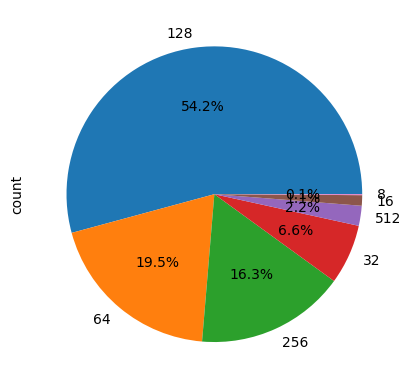

In [ ]:
sp.storage.value_counts().head(10).plot(kind = "pie", autopct = "%0.1f%%")

<Axes: ylabel='count'>

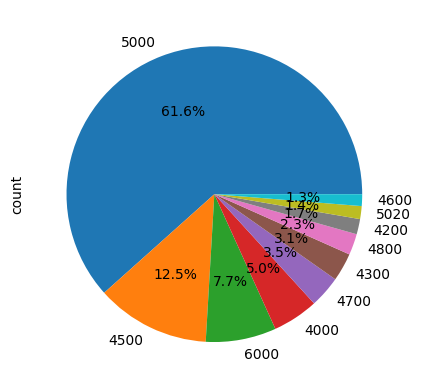

In [ ]:
sp.battery_mah.value_counts().head(10).plot(kind = "pie", autopct = "%0.1f%%")

<Axes: ylabel='count'>

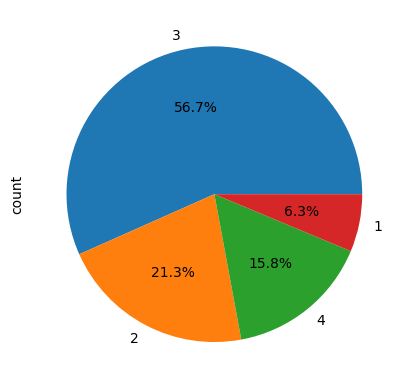

In [ ]:
sp.n_rear_cam.value_counts().head(10).plot(kind = "pie", autopct = "%0.1f%%")

<Axes: ylabel='count'>

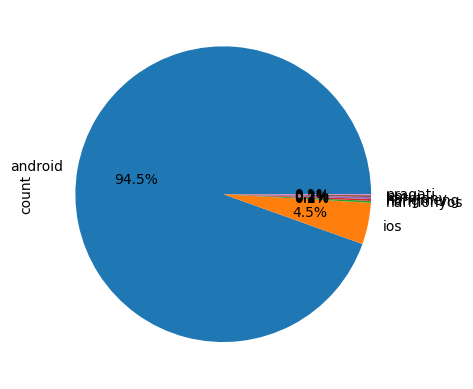

In [ ]:
sp.operating_system.value_counts().head(10).plot(kind = "pie", autopct = "%0.1f%%")

# Bivariate Analysis

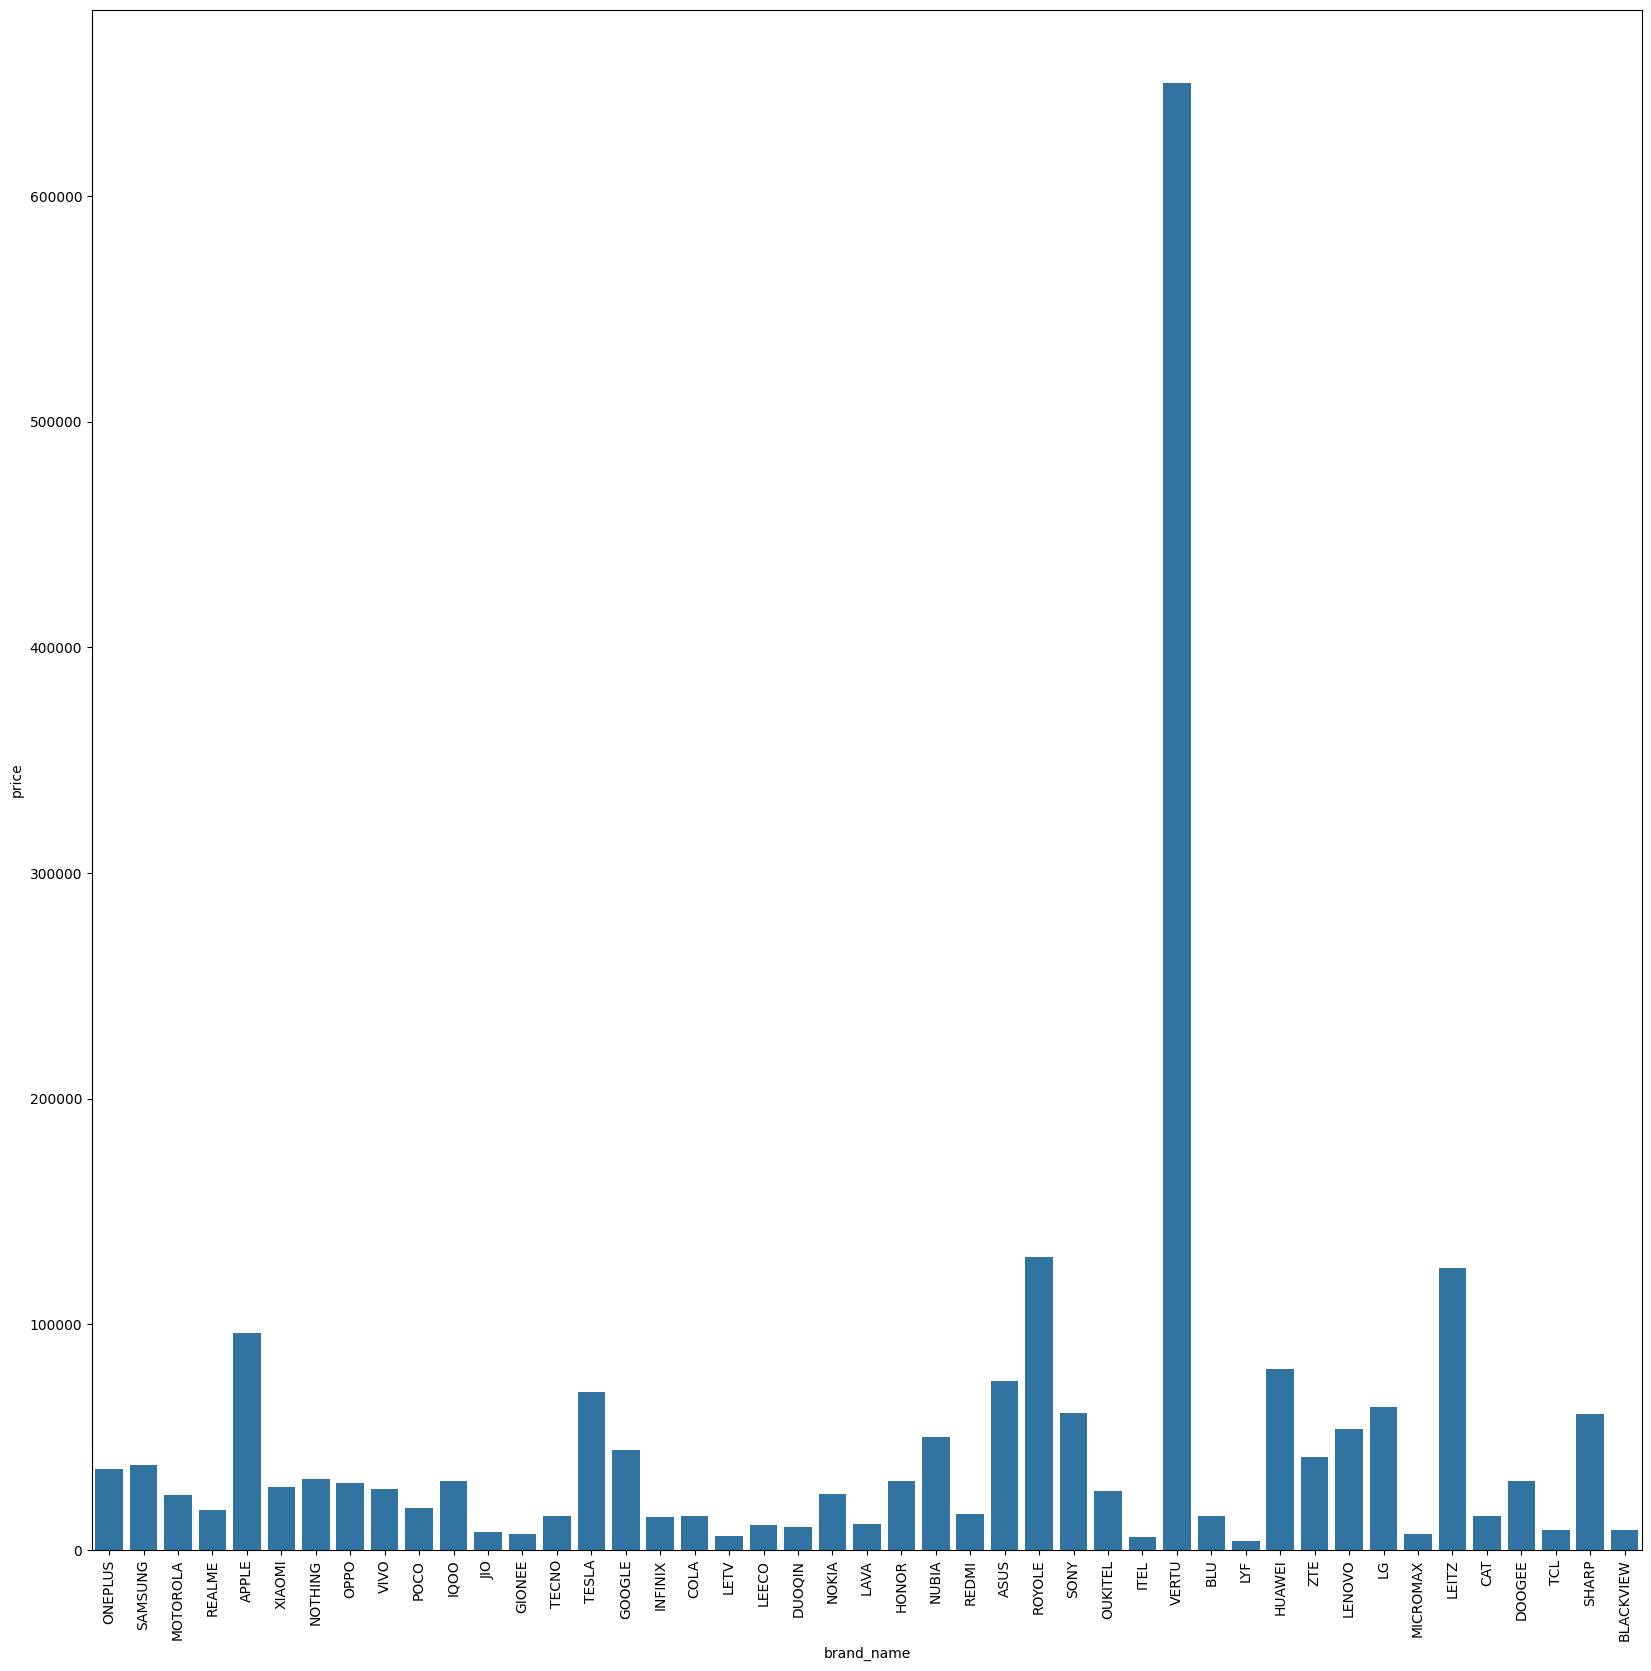

In [ ]:
plt.figure(figsize= (20,20))
sns.barplot(sp, x = "brand_name", y  = "price",errorbar=None, )
plt.xticks(rotation  = "vertical")
plt.show()

In [ ]:
# fetch only those brand which contain > 10 phones

<Axes: xlabel='rating', ylabel='price'>

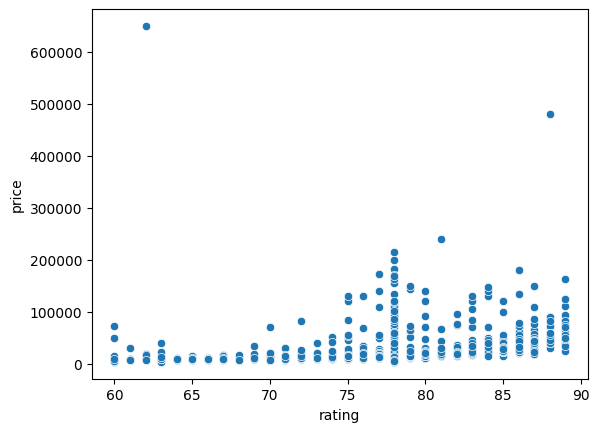

In [ ]:
#price and rating
sns.scatterplot(sp, x = "rating", y = "price")

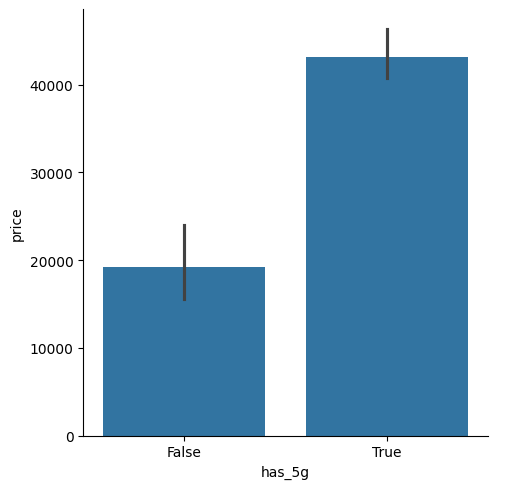

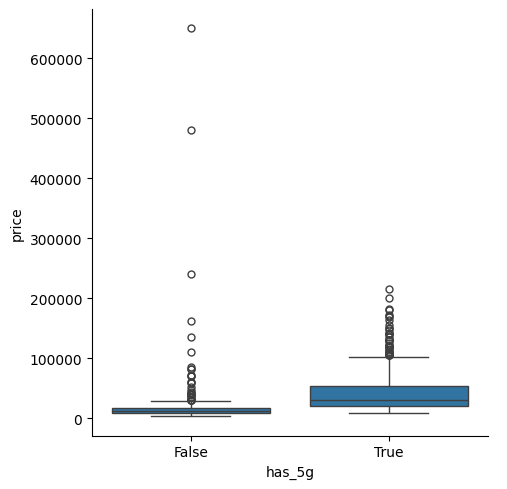

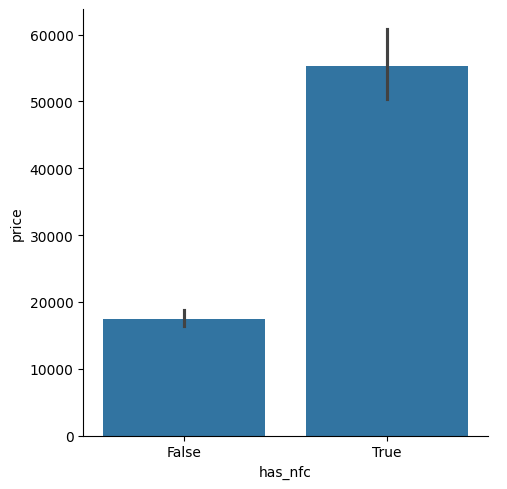

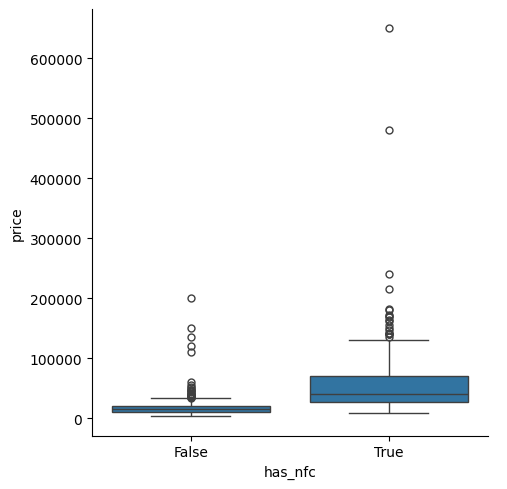

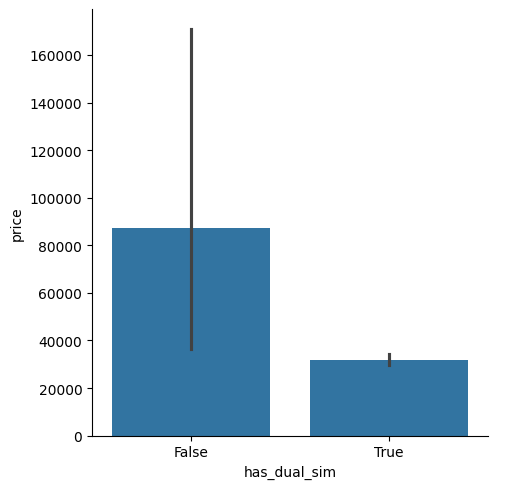

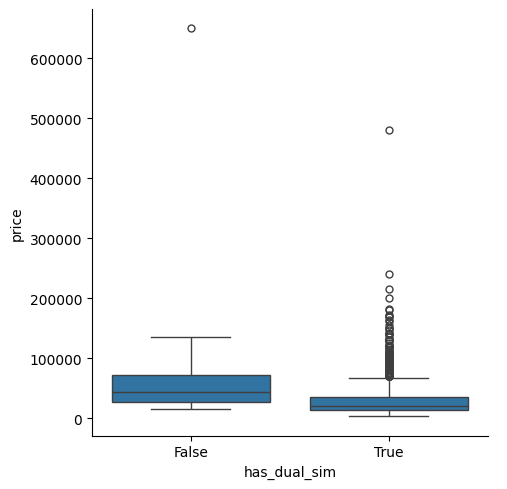

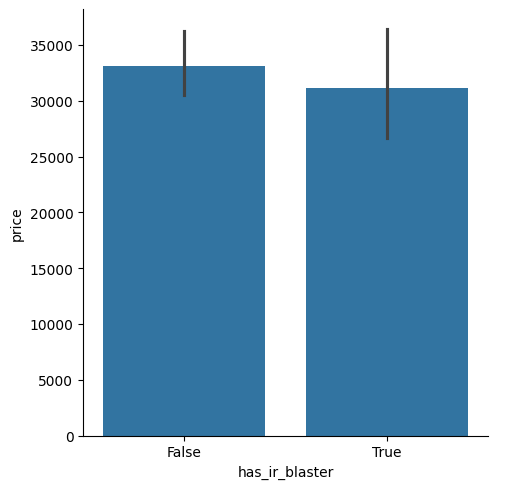

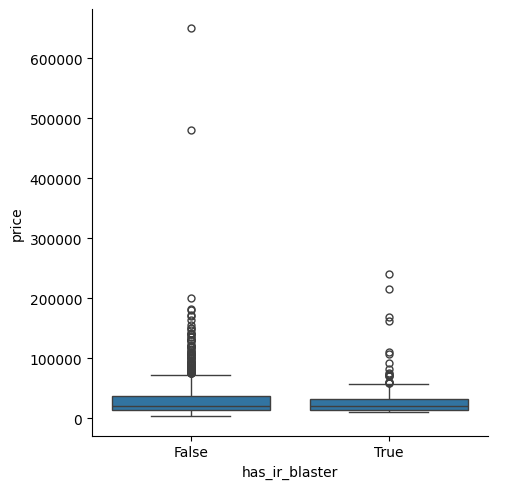

In [ ]:
def num_cat(num,cat):
  sns.catplot(sp, x = cat , y = num, kind = "bar"),
  sns.catplot(sp, x=cat, y=num, kind="box")

num_cat("price","has_5g")
num_cat("price","has_nfc")
num_cat("price","has_dual_sim")
num_cat("price","has_ir_blaster")

In [ ]:
 #processor_brand and price
 #numerical_categorial
 x = sp.groupby("processor_brand").size()
 temp = sp[sp['processor_brand'].isin(x[x > 10].index)]

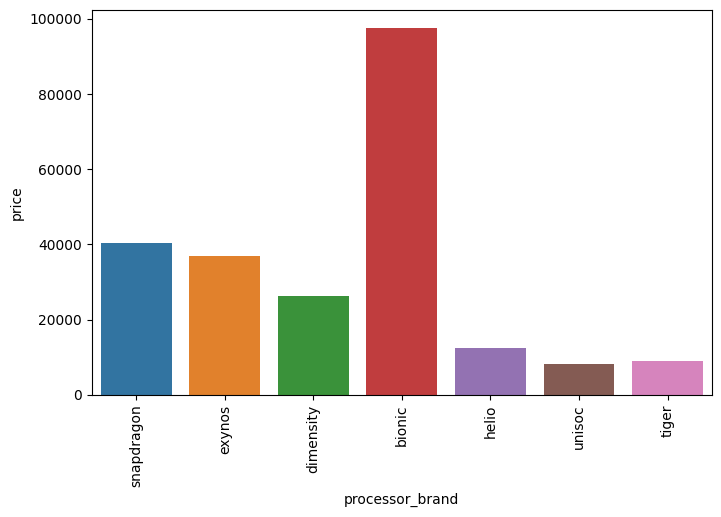

In [ ]:
plt.figure(figsize= (8,5))
sns.barplot(temp, x = "processor_brand", y  = "price",errorbar=None,hue = "processor_brand" )
plt.xticks(rotation  = "vertical")
fig.show()

In [ ]:
def num_num(n1,n2):
  sns.relplot(sp, x = n1,y = n2, kind = "scatter")
  sns.displot(sp, x=n1, y = n2, kind = "kde")


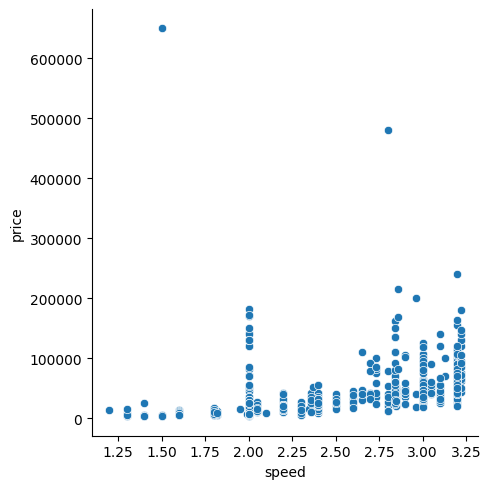

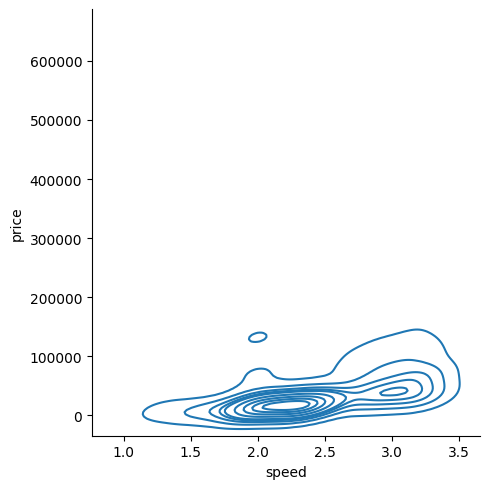

In [ ]:
num_num("speed", "price")

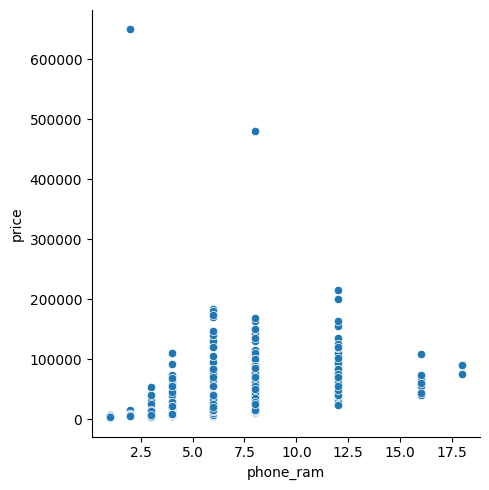

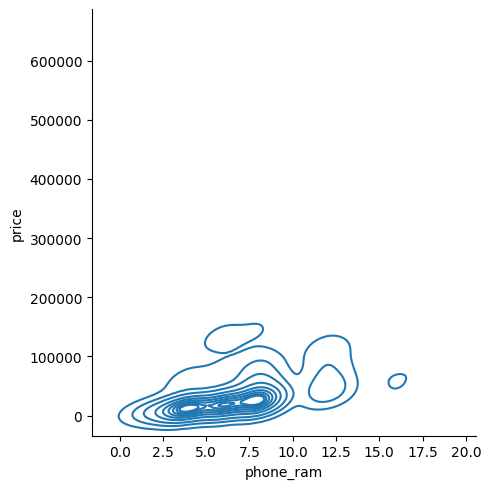

In [ ]:
num_num("phone_ram","price")

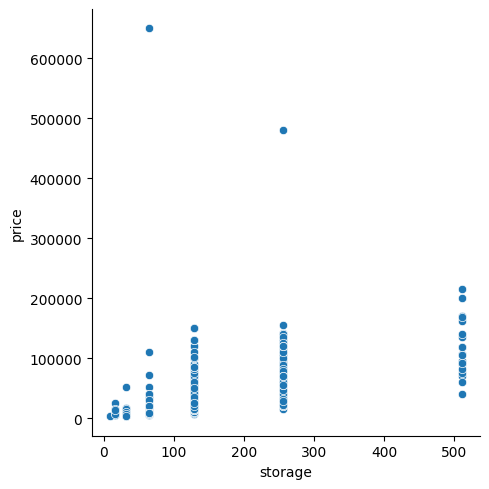

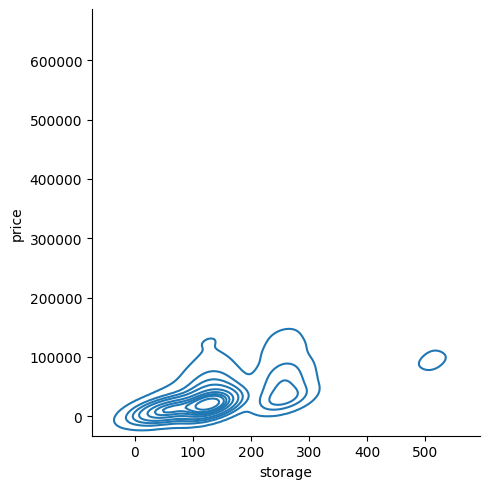

In [ ]:
num_num("storage","price")

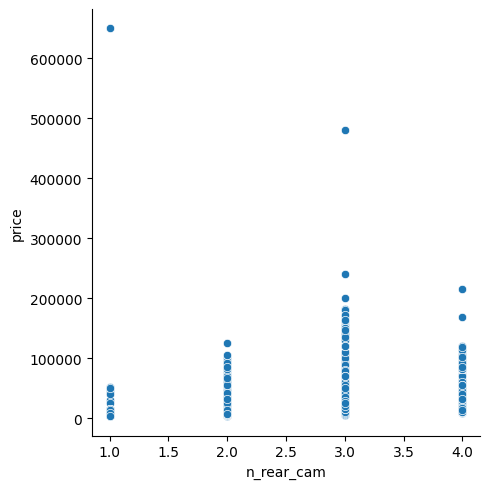

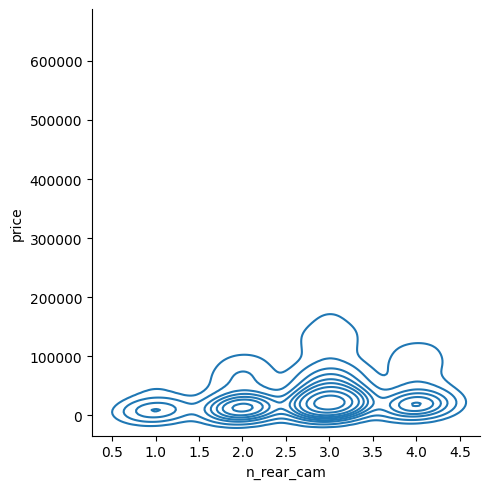

In [ ]:
num_num("n_rear_cam", "price")

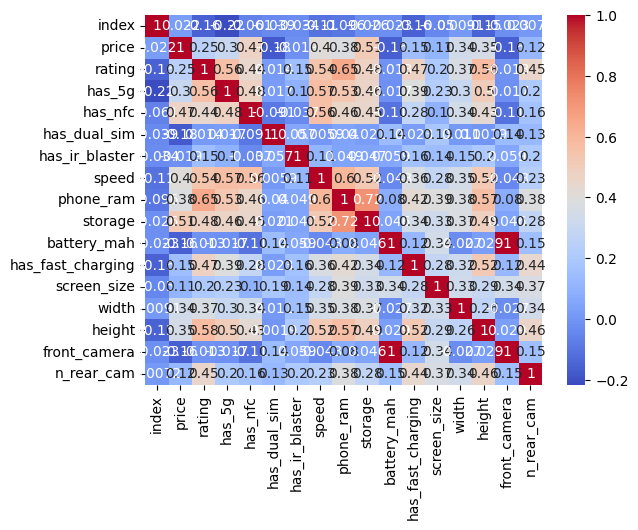

In [ ]:
corr = sp.corr(numeric_only=True)

sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()
